# Bài tập 6


Bùi Trọng Xuyến - 1612835

---

## Câu 1: Overfitting and Deterministic Noise
Định nghĩa deterministic noise: là một phần của $f$ mà $\mathcal H$ không thể capture được. $f(\mathbf{x}) − h^∗(\mathbf{x})$". Trong đó, $h^*(\mathbf{x})$ là hàm tốt nhất của $\mathcal H$ dùng để xấp xỉ $f$.

Nghĩa là trong số các $\mathcal{H'} \subset \mathcal{H}$ thì chỉ có một $\mathcal{H'}$ làm cho giá trị nhiễu là nhỏ nhất.

Vậy, khi dùng $\mathcal H' \subset  \mathcal H$ thì nhìn chung giá trị nhiễu sẽ tăng lên.

**Câu 1:** [b]. In general, deterministic noise will increase.

## Câu 2-6: Regularization with Weight Decay

Import các thư viện cần thiết và lấy dữ liệu từ file cho sẵn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#load train-data from "in.dta"
train_data = np.loadtxt("in.dta.txt")
out_data = np.loadtxt("out.dta.txt")

train_X = train_data[:, 0:2]
train_Y = train_data[:, 2].reshape(-1, 1)
out_X = out_data[:, 0:2]
out_Y = out_data[:, 2].reshape(-1, 1)

Hàm nonlinear transform

In [2]:
def nonlinearTransform(X):
    """
    parameter:
    ----------
    X: input matrix
        shape: (N, 2)
    return:
    -------
    result: input matrix
        shape: (N, 8)
    """
    result = np.zeros((X.shape[0], 8))
    
    # Apply function as question
    result[:, 0] = 1
    result[:, 1] = X[:, 0]
    result[:, 2] = X[:, 1]
    result[:, 3] = X[:, 0]**2
    result[:, 4] = X[:, 1]**2
    result[:, 5] = X[:, 0]*X[:, 1]
    result[:, 6] = abs(X[:, 0] - X[:, 1])
    result[:, 7] = abs(X[:, 0] + X[:, 1])
    
    return result

Chuyển tập dữ liệu ban đầu bằng công thức trainsform

In [3]:
iZ = nonlinearTransform(train_X)
iY = np.copy(train_Y)

oZ = nonlinearTransform(out_X)
oY = np.copy(out_Y)

Hàm tìm Wreg theo công thức học có tiết chế

In [4]:
def linearRegressionReg(Z, y, lamda):
    """
    parameters
    ----------
    Z: matrix input after nonlinear transform
        shape (N, 8)
    y: vector label true
        shape (N, 1)
    lamda: float
    return
    -------
    Wreg: weight of linearRegressReg
        shape (8, 1)
    """
    zTz = np.dot(Z.T, Z)
    # cost matrix [1 0 .. 0]
    #             [0 1 .. 0]
    #             [ ...... ]
    #             [0 .... 1]
    I = np.eye(zTz.shape[0])
    
    return np.dot(np.dot(np.linalg.inv(zTz + lamda*I), Z.T), y)

Hàm tính độ lỗi theo Euclidean distance

In [5]:
def E(Z, Wreg, Y):
    """
    paramters
    ---------
    Z: input matrix after transform
        shape (N, 8)
    Wreg: weight reg
        shape (8, 1)
    Y: vector label true
        shape (8, 1)
    return
    ------
    Average error with euclidene distance
    """
    return np.mean(np.sign(np.dot(Z, Wreg)) != Y)

**Câu 2:**

In [6]:
def Q2(iZ, iY, oZ, oY):
    # Calc weight reg with indata
    Wreg = linearRegressionReg(iZ, iY, 0)
    # Calc error on indata
    errorIn = E(iZ, Wreg, iY)
    # Calc error on outdata
    errorOut = E(oZ, Wreg, oY)
    
    print("(Error in, Error out): ", errorIn, errorOut)
#show result
Q2(iZ, iY, oZ, oY)

(Error in, Error out):  0.02857142857142857 0.084


Vậy đáp án cần chọn là [a]. 0.03, 0.08

**Câu 3:**

In [7]:
def Q3(iZ, iY, oZ, oY):
    # Calc weight reg with indata
    Wreg = linearRegressionReg(iZ, iY, 10**-3)
    # Calc error on indata
    errorIn = E(iZ, Wreg, iY)
    # Calc error on outdata
    errorOut = E(oZ, Wreg, oY)
    
    print("(Error in, Error out): ", errorIn, errorOut)
#show result
Q3(iZ, iY, oZ, oY)

(Error in, Error out):  0.02857142857142857 0.08


Vậy đáp án cần chọn là [1]. 0.03, 0.08

**Câu 4:**

In [8]:
def Q4(iZ, iY, oZ, oY):
    # Calc weight reg with indata
    Wreg = linearRegressionReg(iZ, iY, 10**3)
    # Calc error on indata
    errorIn = E(iZ, Wreg, iY)
    # Calc error on outdata
    errorOut = E(oZ, Wreg, oY)
    
    print("(Error in, Error out): ", errorIn, errorOut)
#show result
Q4(iZ, iY, oZ, oY)

(Error in, Error out):  0.37142857142857144 0.436


Vậy đáp án là [e]. 0.4, 0.4

**Câu 5:**

In [9]:
def Q5(iZ, iY, oZ, oY):
    K = [2, 1, 0, -1, -2]
    
    for k in K:
        Wreg = linearRegressionReg(iZ, iY, 10**k)
        # Calc error on outdata
        errorOut = E(oZ, Wreg, oY)
        print("k = ", k, ": ", errorOut)
#show result
Q5(iZ, iY, oZ, oY)

k =  2 :  0.228
k =  1 :  0.124
k =  0 :  0.092
k =  -1 :  0.056
k =  -2 :  0.084


Vậy chọn đáp án [d]. -1

**Câu 6:**

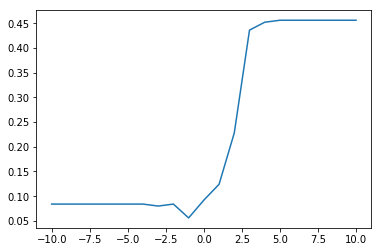

[0.084 0.084 0.084 0.084 0.084 0.084 0.084 0.08  0.084 0.056 0.092 0.124
 0.228 0.436 0.452 0.456 0.456 0.456 0.456 0.456 0.456]


In [10]:
def Q6(iZ, iY, oZ, oY):
    K = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    error = np.zeros(len(K))
    
    for idx in range(len(K)):
        Wreg = linearRegressionReg(iZ, iY, 10**K[idx])
        
        # Calc error on outdata
        error[idx] = E(oZ, Wreg, oY)
    
    #show plot
    plt.plot(K, error)
    plt.show()
    print(error)

#show result
Q6(iZ, iY, oZ, oY)

Dựa vào biểu đồ và số liệu bên dưới thì giá trị độ lỗi nhỏ nhất là 0.056 ứng với $k=-1$.

Vậy chọn đáp án [b]. 0.06

## Câu 7: Regularization for Polynomials
Ta có phép biến đổi: $$x \in \mathbb{R} \rightarrow \mathbf{z} \in \mathbb{R}^{Q+1}$$
với $\mathbf{z} = (1, L_1(x), L_2(x), ..., L_Q(x))$. Trong đó $L_Q(x)$ là đa thức larange bậc Q.

Như vậy, $$\mathcal{H}_Q = \{h | h(x) = \mathbf{w}^T z = \sum^{Q}_{q=0} w_q L_q(x)\},$$ là một hypothesis có có Q + 1 thành phần với bậc cao nhất là Q.

Còn theo câu 7, ta có: $$\mathcal{H}(Q, C, Q_0) = \{ h | h(x) = \mathbf{w}^T z \in \mathcal{H}_Q; w_q = C for q \geq Q_0\}, $$ là một hypothesis có bậc cao nhất là Q, các phần từ có bậc từ $Q_0$ sẽ có trọng số là $w_q = C$.

[a]. $\mathcal{H}(10, 0, 3) \cup \mathcal{H}(10, 0, 4)$ - bậc 2 hợp với bậc 3 = bậc 3 nên câu a sai.

[b]. $\mathcal{H}(10, 1, 3) \cup \mathcal{H}(10, 1, 4)$ - bậc 10 hợp với bậc 10 = bậc 10 nên câu b cũng sai.

[c]. $\mathcal{H}(10, 0, 3) \cap \mathcal{H}(10, 0, 4)$ - bậc 2 giao với bậc 3 = bậc 2 nên câu c đúng.

[d]. $\mathcal{H}(10, 1, 3) \cap \mathcal{H}(10, 1, 4)$ - bậc 10 giao với bậc 10 = bậc 10 nên câu d cũng sai.

Vậy ta chọn đáp án [c]. $\mathcal{H}(10, 0, 3) \cap \mathcal{H}(10, 0, 4) = \mathcal{H}_2$

## Câu 8-10: Neural Networks

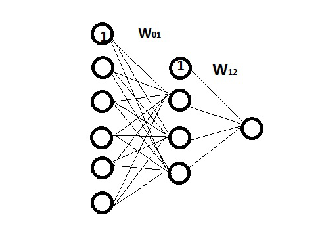

In [11]:
import matplotlib.image as mpimg

img = mpimg.imread('neuralNet.jpg')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

**Câu 8:**

Ta mô hình hóa các thông tin thành hình ảnh như trên. Ta sẽ có 3 bước như sau:

- Feedforward Step: Từ input layer đến hidden layer1 có $6 x 3 = 18$ phép tính, từ hidden layer1 đến output layer có $4 x 1 = 4$ phép tính. Kết quả là 22 phép tính.
- Backpropagation Step: Ở đây ta chỉ tính delta ở vị trí ouput layer và hidden layer1, nhưng vì output layer việc tính delta không giúp ích nên không được xem là một phép tính, ở hidden layer1 có node 1 không truy về nên không cần tính delta. Vậy có 3 phép tính.
- Weight Update Step: Ta update tất cả các trọng số như bước 1, có 22 phép tính

Vậy có tổng cộng là 47 phép tính được thực hiện.

Chọn đáp án [d]. 45

**Câu 9:** Phân tích đề bài ta có:
- có 10 input unit(10 node input).
- Có 36 hidden unit(chưa biết bao nhiêu hidden layer những trong đó có tất cả là 36 node).
- Có 1 ouput unit(ouput node)

Hãy tìm số lượng trọng số nhỏ nhất mà mạng này có thể có.

- Vì đây là mạng neural network nên sự liên kết giữa hidden layer với ouput là fullconnected nên cần giảm số lượng hiddenlayer cuối. và nó không thể bằng 1 nên hiddenlayer cuối là 2.
- Còn bên trong các hidden thì chúng ta cần tăng constant unit vì nó không có sự liên kết sẽ giúp giảm trọng số, vậy ta sẽ có 18 hidden layer, mỗi hiddenlayer có 2 unit (1 unit bt và 1 constant unit).
- Từ input đến hiddenlayer1 thì cũng là full connected, và liên kết với unit bình thường.
Vậy số weight nhỏ nhất là $$ 10 x 1 + 2 x 17 + 2 = 46$$

Đáp án là [a]. 46

**Câu 10:** Như câu 9 nhưng là trường hợp ngược lại

- Chúng ta cần phải giảm constant unit để tăng lượng weight, ta thiết kết mạng 2 hidden layer (22 - 14).
- Ta có số lượng weight: $$ 10 x 21 + 22 x 13 + 14 x 1 = 510$$

Vậy ta chọn đáp án [e]. 510